In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})

In [5]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
input_pbs = pd.read_csv('notebook6-extractFeature-thispbs.csv')

In [8]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1, inplace=True)

In [15]:
input_pbs.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token', 'numToken', 'numChar', 'year-month', 'month', 'year',
       'sentiment', 'timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation', 'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'nu

In [13]:
input_pbs['is_pos'] = (input_pbs['sentiment']=='pos')
input_pbs['is_neg'] = (input_pbs['sentiment']=='neg')
input_pbs['is_pos'] = input_pbs['is_pos'].astype(int)
input_pbs['is_neg'] = input_pbs['is_neg'].astype(int)

In [162]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1


In [16]:
input_pbs_feature = input_pbs[['view', 'hour',
       'numTag',  'numToken', 'numChar', 'month', 'year',
        'timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation', 'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst', 'is_pos',
       'is_neg']]

In [163]:
input_pbs.to_csv('notebook7-extractFeature-thispbs.csv')

In [17]:
input_pbs_feature.describe()

,view,hour,numTag,numToken,numChar,month,year,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg
count,2.753800e+04,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.0,27538.0,27538.0,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.000000,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000
mean,2.455730e+03,13.481444,8.777035,8.450105,41.856417,6.411141,2560.104619,635.797625,6.190972,0.002615,1.692970,0.003305,0.111882,0.027054,0.264834,0.000109,0.021643,0.0,0.0,0.0,0.0,0.0,0.082831,0.115586,0.028797,0.147614,0.190791,0.100915,0.039001,0.065764,0.100261,0.0,0.026581,0.006500,0.044702,0.021970,0.001344,0.000327,0.004612,0.010785,0.001344,0.001961,0.742207,0.194636,0.003213,0.004975,0.0,0.0,0.000073,0.215230,0.029160,0.143983,0.0,0.183238,0.0,0.000617,0.000109,0.068596,0.175176,0.356271,0.683932,0.685555,0.159816,0.165916,0.164536,0.164972,0.158980,0.091437,0.094342,0.185780,456.929625,81.833866,4.749619,1.679679,1.004467,1.867892,1.014053,0.607379,0.334701,0.665299
std,1.272891e+04,4.386786,2.807466,2.558946,11.283529,3.480673,0.946236,339.857556,2.035551,0.053836,1.278104,0.057391,0.329533,0.163580,0.516903,0.010437,0.146512,0.0,0.0,0.0,0.0,0.0,0.275632,0.319733,0.167237,0.354724,0.392932,0.301222,0.193600,0.247873,0.300354,0.0,0.160860,0.080362,0.206652,0.146587,0.036631,0.018076,0.067755,0.103292,0.036631,0.044240,0.151670,0.134997,0.020316,0.070359,0.0,0.0,0.008522,0.471019,0.169761,0.382560,0.0,0.427959,0.0,0.024839,0.010437,0.268920,0.425814,0.614363,0.098170,0.094661,0.366442,0.372012,0.370768,0.371162,0.365664,0.288235,0.292310,0.388936,506.374207,90.154448,15.718019,3.944256,1.504595,5.342622,2.429076,1.066428,0.471894,0.471894
min,2.000000e+01,0.000000,1.000000,1.000000,4.000000,1.000000,2559.000000,-213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.341418,0.329535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530000e+02,10.000000,7.000000,7.000000,34.000000,3.000000,2

<function matplotlib.pyplot.show(*args, **kw)>

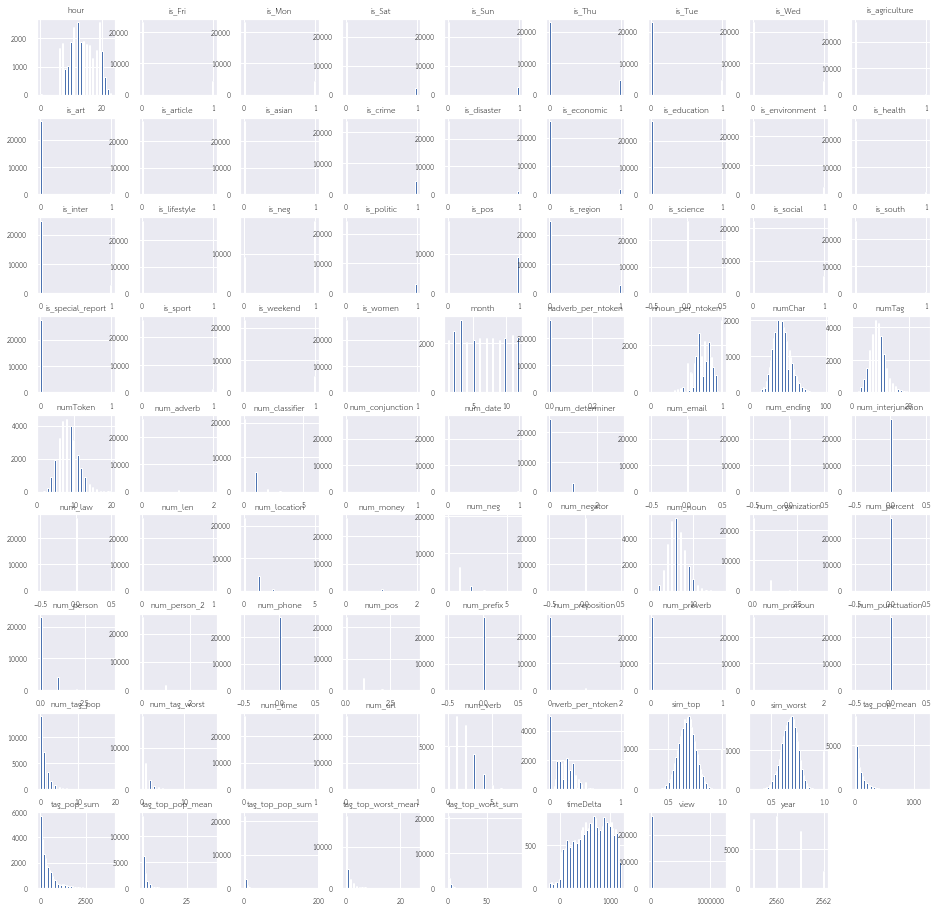

In [18]:
input_pbs_feature.hist(bins=50, figsize= (16,16))
plt.show

/home/burin/py_36_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


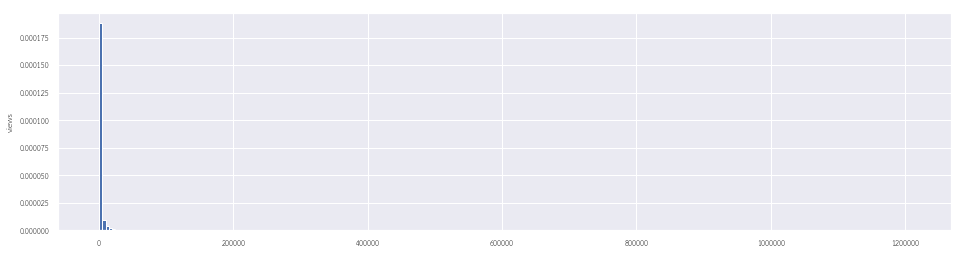

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

x = input_pbs_feature['view']
plt.hist(x, normed=True, bins=250)
plt.ylabel('views');

/home/burin/py_36_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


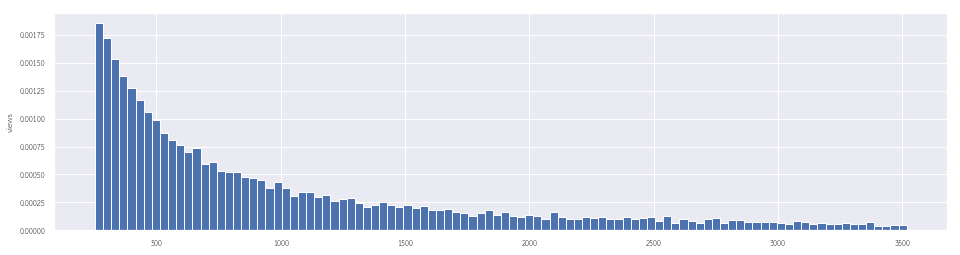

In [32]:
def reject_outliers():
    IQRval = input_pbs_feature['view'].describe().loc['75%']-input_pbs_feature['view'].describe().loc['25%']
    outlierMin = max(input_pbs_feature['view'].describe().loc['25%'],0)
    outlierMax = input_pbs_feature['view'].describe().loc['75%']+1.5*IQRval
    filtered = input_pbs_feature[(input_pbs_feature['view']<=outlierMax) & (input_pbs_feature['view']>=outlierMin)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

input_pbs_feature = reject_outliers()
x = input_pbs_feature['view']
plt.hist(x, normed=True, bins=100)
plt.ylabel('views');

In [69]:
input_pbs_feature.shape

(17276, 70)

In [58]:
input_pbs_feature.drop(['num_interjunction','num_prefix','num_ending' ,'num_negator', 'num_punctuation', 'is_science', 
              'num_email',  'num_law',  'num_percent',  'num_phone'  ], axis=1,inplace=True)

In [160]:
corrmat = input_pbs_feature.corr()
pd.DataFrame(corrmat['view'].sort_values(ascending=False))

,view
view,1.000000
year,0.163908
num_tag_pop,0.120856
tag_top_pop_sum,0.108200
tag_top_pop_mean,0.108167
sim_top,0.070299
is_social,0.066968
numTag,0.024170
is_health,0.024088
tag_pop_sum,0.023209


In [161]:
with pd.option_context("display.max_rows", 1000):
    display(pd.DataFrame(corrmat['view'].sort_values(ascending=False)))

,view
view,1.000000
year,0.163908
num_tag_pop,0.120856
tag_top_pop_sum,0.108200
tag_top_pop_mean,0.108167
sim_top,0.070299
is_social,0.066968
numTag,0.024170
is_health,0.024088
tag_pop_sum,0.023209


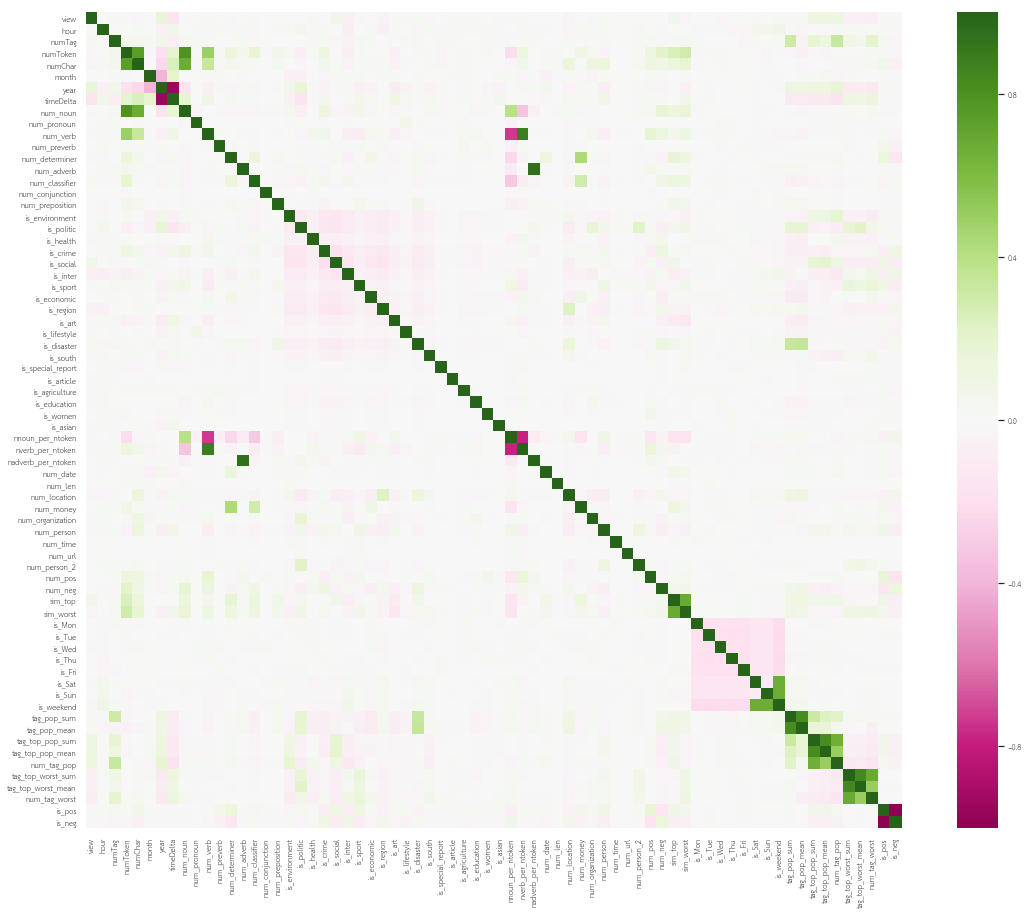

In [60]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=1, square=True,cmap="PiYG");
plt.show()

In [ ]:
corrmat['view'].sort_values(ascending=False)[:16]

In [62]:
train_set, test_set = train_test_split(input_pbs_feature, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['view'], axis=1) #Dropping both 'shares', the predicted variable and 'url', a text variable
y_train_set = train_set['view']

X_test_set = test_set.drop(['view'], axis=1)
y_test_set = test_set['view']

### linear regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
df_someXdata_LR[:50]

,Actual views,Predicted views
0,1103,846.367272
1,841,1228.096262
2,1161,1076.292219
3,752,994.986246
4,1741,1057.720301
5,625,782.080149
6,2440,882.549850
7,535,966.932487
8,978,637.328955
9,614,654.336682


AttributeError: module 'seaborn' has no attribute 'plt'

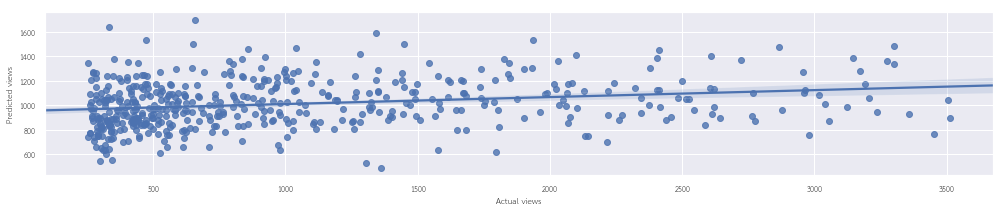

In [74]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [78]:
view_predictions = lin_reg.predict(X_train_set)
lin_mse = mean_squared_error(y_train_set, view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

751.8336962437413

In [79]:
input_pbs_feature['view'].median()

702.0

In [80]:
lin_mae = mean_absolute_error(y_train_set, view_predictions)
print(lin_mae)

585.7078115993327


### Dicision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [83]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_set, y_train_set)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [87]:
some_X_data = X_train_set.iloc[:20]
some_y_data = y_train_set.iloc[:20]
print("Predicted shares:", tree_reg.predict(some_X_data))
print("Actual shares   :", list(some_y_data))

Predicted shares: [1103.  841. 1161.  752. 1741.  625. 2440.  535.  978.  614.  592.  382.
 2962.  474. 1750. 1046.  388.  814.  485.  341.]
Actual shares   : [1103, 841, 1161, 752, 1741, 625, 2440, 535, 978, 614, 592, 382, 2962, 474, 1750, 1046, 388, 814, 485, 341]


In [89]:
view_predictions = tree_reg.predict(X_train_set)
tree_mse = mean_squared_error(y_train_set, view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [90]:
tree_mae = mean_absolute_error(y_train_set, view_predictions)
print(tree_mae)

0.0


In [99]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(tree_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,1103,1103.0
1,841,841.0
2,1161,1161.0
3,752,752.0
4,1741,1741.0


AttributeError: module 'seaborn' has no attribute 'plt'

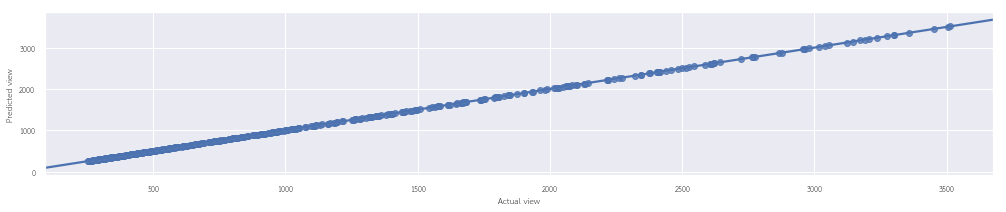

In [100]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

### Cross validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
scores = cross_val_score(tree_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [94]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1123.45912002 1115.86016998 1070.72874443 1124.77043742 1123.99334315
 1075.94196001 1113.24342987 1052.99198071 1022.45584508 1079.42569886]
Mean: 1090.28707295353
Standard deviation: 33.62269576550829


In [95]:
lin_scores = cross_val_score(lin_reg, X_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) #with outliers:mean 13185 std 7605

Scores: [763.09547351 742.4893699  762.01007123 779.6830227  774.7758275
 753.25765331 747.68291941 756.19695168 727.57015944 747.6145654 ]
Mean: 755.4376014065557
Standard deviation: 14.610142364851479


### Random Forest

In [142]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_set, y_train_set)

/home/burin/py_36_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [143]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(forest_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,1103,1153.1
1,841,1171.5
2,1161,1161.0
3,752,830.9
4,1741,1480.1


AttributeError: module 'seaborn' has no attribute 'plt'

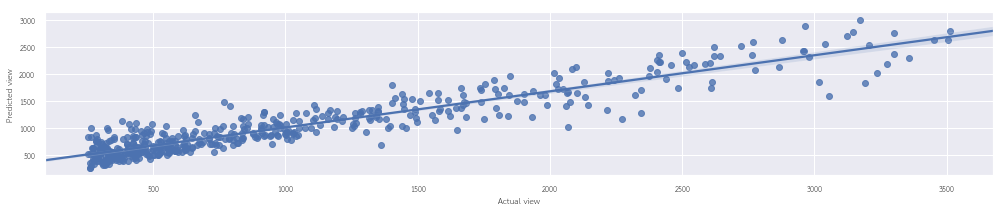

In [144]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

In [101]:
share_predictions = forest_reg.predict(X_train_set)
forest_mse = mean_squared_error(y_train_set, share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

338.8053820039155

In [102]:
forest_mae = mean_absolute_error(y_train_set, share_predictions)
print(forest_mae) #with outliers:1424

244.07141099855284


In [103]:
scores = cross_val_score(forest_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [104]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [814.39528314 783.5668603  796.1578792  833.51534145 820.07862098
 806.78144263 808.87053304 805.99397423 773.70915069 790.61732444]
Mean: 803.3686410108955
Standard deviation: 16.86662759885753


### Find important feature

In [106]:
from sklearn.model_selection import GridSearchCV


In [107]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [108]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

877.803873264406 {'max_features': 2, 'n_estimators': 3}
795.1493019617604 {'max_features': 2, 'n_estimators': 10}
877.7825047053577 {'max_features': 3, 'n_estimators': 3}
793.5032371828621 {'max_features': 3, 'n_estimators': 10}
877.3757340560563 {'max_features': 4, 'n_estimators': 3}
795.157813488407 {'max_features': 4, 'n_estimators': 10}
878.4557651123048 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
798.3868317280167 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
880.0822817032149 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
795.305537820422 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
878.8811316166814 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
796.5986080219197 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [109]:
print(grid_search.best_params_)

{'max_features': 3, 'n_estimators': 10}


In [113]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [114]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_set, y_train_set)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb75b740b38>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb75b7409e8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [115]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

783.2818165385654 {'max_features': 7, 'n_estimators': 15}
806.7864604512781 {'max_features': 3, 'n_estimators': 8}
811.5813238204194 {'max_features': 5, 'n_estimators': 7}
778.2073268738518 {'max_features': 2, 'n_estimators': 19}
792.5444057243922 {'max_features': 7, 'n_estimators': 11}
846.4693903015268 {'max_features': 3, 'n_estimators': 4}
928.605863442675 {'max_features': 3, 'n_estimators': 2}
822.957295034728 {'max_features': 4, 'n_estimators': 6}
1082.2953576748691 {'max_features': 2, 'n_estimators': 1}
788.756764946504 {'max_features': 4, 'n_estimators': 12}


In [116]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.33694834e-02, 4.07738845e-02, 3.51086214e-02, 4.98835101e-02,
       3.71723020e-02, 2.56511206e-02, 6.34949207e-02, 3.42011811e-02,
       4.29534815e-04, 2.29294414e-02, 5.67323592e-04, 7.57268619e-03,
       2.65482495e-03, 1.11002188e-02, 3.91363737e-06, 2.89972846e-03,
       5.44120983e-03, 5.55278965e-03, 3.32041544e-03, 6.77584963e-03,
       7.43827400e-03, 5.63346125e-03, 2.91562978e-03, 4.99536941e-03,
       5.75743941e-03, 3.02098884e-03, 2.13418556e-03, 3.74990423e-03,
       2.02897654e-03, 2.01759667e-04, 3.26445734e-05, 1.06930552e-03,
       1.82272786e-03, 8.01750083e-04, 1.04413496e-04, 3.97369726e-02,
       3.58165908e-02, 3.82095444e-03, 1.01372282e-03, 2.90196491e-06,
       1.06440627e-02, 2.28607923e-03, 9.59904171e-03, 1.19594511e-02,
       2.14505528e-04, 1.33416714e-05, 6.12380502e-03, 1.05880076e-02,
       1.47629911e-02, 6.10249726e-02, 5.32885662e-02, 9.02730161e-03,
       9.25417658e-03, 6.39106066e-03, 8.01987560e-03, 8.87171430e-03,
      

In [120]:
input_pbs_feature.columns.drop('view')

Index(['hour', 'numTag', 'numToken', 'numChar', 'month', 'year', 'timeDelta',
       'num_noun', 'num_pronoun', 'num_verb', 'num_preverb', 'num_determiner',
       'num_adverb', 'num_classifier', 'num_conjunction', 'num_preposition',
       'is_environment', 'is_politic', 'is_health', 'is_crime', 'is_social',
       'is_inter', 'is_sport', 'is_economic', 'is_region', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_len', 'num_location', 'num_money', 'num_organization',
       'num_person', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum'

In [121]:
sorted(zip(feature_importances, input_pbs_feature.columns.drop('view')), reverse=True)

[(0.06349492067226739, 'timeDelta'),
 (0.06102497260970703, 'sim_top'),
 (0.05488041600650743, 'tag_pop_sum'),
 (0.05328856624811153, 'sim_worst'),
 (0.05102146972925674, 'tag_pop_mean'),
 (0.04988351005231312, 'numChar'),
 (0.043369483361047186, 'hour'),
 (0.04077388452759016, 'numTag'),
 (0.0397369725699641, 'nnoun_per_ntoken'),
 (0.03717230197323318, 'month'),
 (0.03581659084022735, 'nverb_per_ntoken'),
 (0.03510862144944369, 'numToken'),
 (0.03420118113920486, 'num_noun'),
 (0.03024262887374517, 'tag_top_pop_sum'),
 (0.025651120640871106, 'year'),
 (0.024713014416572938, 'tag_top_pop_mean'),
 (0.02292944137251247, 'num_verb'),
 (0.02125101251695056, 'num_tag_pop'),
 (0.015492251945427974, 'tag_top_worst_sum'),
 (0.014762991089384284, 'num_neg'),
 (0.012826374701598453, 'tag_top_worst_mean'),
 (0.011959451074084769, 'num_person'),
 (0.01110021878411968, 'num_classifier'),
 (0.010644062683742985, 'num_location'),
 (0.010588007601619424, 'num_pos'),
 (0.00990766175712058, 'num_tag_wor

In [125]:
df_nn = pd.DataFrame(feature_importances, input_pbs_feature.columns.drop('view'))
df_nn.reset_index(level=0, inplace=True)
df_nn.sort_values(0,ascending=False).rename(index=str, columns={"index": "Feature", 0: "importance"})

,Feature,importance
6,timeDelta,0.063495
49,sim_top,0.061025
59,tag_pop_sum,0.054880
50,sim_worst,0.053289
60,tag_pop_mean,0.051021
3,numChar,0.049884
0,hour,0.043369
1,numTag,0.040774
35,nnoun_per_ntoken,0.039737
4,month,0.037172


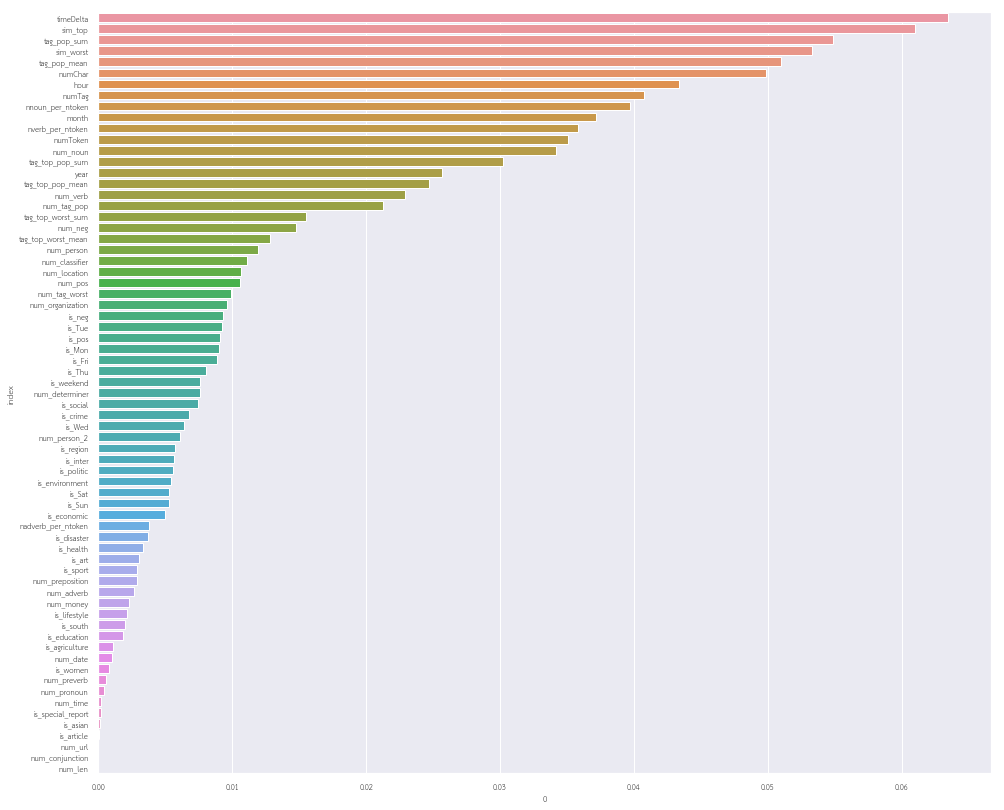

In [126]:
f, ax = plt.subplots(figsize=(16, 14))
sns.set_color_codes("pastel")
ax = sns.barplot( y='index', x= 0, data=df_nn.sort_values([0], ascending=[False]))

### Evaluate

In [151]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

787.445308741667

In [152]:
some_X_data = X_test_set.iloc[:] #seems to be working also w-o .iloc!
some_y_data = y_test_set.iloc[:] #seems to be working also w-o .iloc!

Predicted_shares = list(final_model.predict(some_X_data)) 

Actual_shares = list(some_y_data)

final_data = [Predicted_shares, Actual_shares]

In [153]:
sorted(zip(Predicted_shares, Actual_shares), reverse=True);

In [ ]:
df_shares = pd.DataFrame(Predicted_shares, Actual_shares)   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

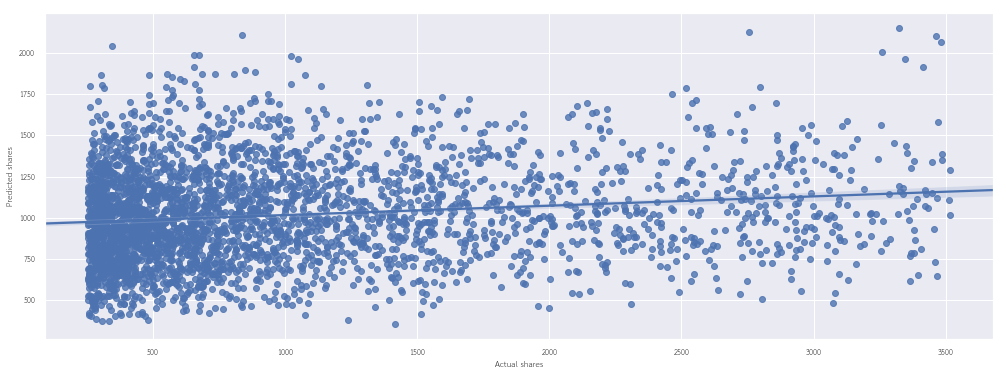

In [155]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_shares_AvsP["Actual shares"], y=df_shares_AvsP["Predicted shares"])
sns.plt.show()

/home/burin/py_36_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


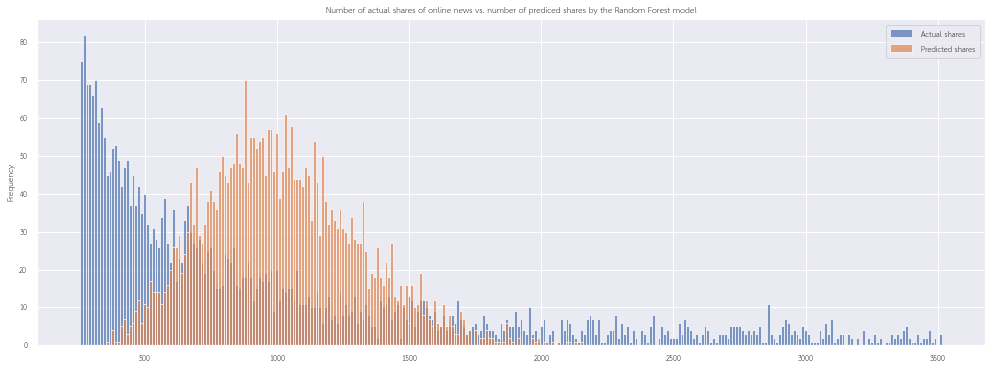

In [156]:
fig_size[0]=17.0
fig_size[1]=6.0

df_shares_AvsP.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [157]:
from sklearn.metrics import r2_score

r2_score( Actual_shares, Predicted_shares)

-0.027467225309119936

In [158]:
input_pbs[:50]

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1
5,พิธีพลีกรรมตักน้ำจากแหล่งน้ำศักดิ์สิทธิ์สำคัญ 76 จังหวัด,2019-05-04,FRI,17:59,4155,สังคม,"พระราชพิธีบรมราชาภิเษก,รัชกาลที่ 10,พลีกรรมตักน้ำจากแหล่งน้ำศักดิ์สิทธิ์,น้ำอภิเษก,ThaiPBSnews",17,5,"พิธีพลีกรรม,ตัก,น้ำ,แหล่ง,น้ำ,ศักดิ์สิทธิ์,จังหวัด",7,44,2562-04,4,2562,neg,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.579392,0.616058,0,0,0,0,1,0,0,0,63,15,8,4,2,0,0,0,0,1
6,ปิดล้อมตลาดโรงเกลือรวบแรงงานข้ามแดนผิด กม.,2019-05-04,FRI,17:53,428,อาชญากรรม,"ตลาดโรงเกลือ,แรงงานกัมพูชา,ละเมิดลิขสิทธิ์,ไทยพีบีเอส,ข่าวไทยพีบีเอส",17,5,"ล้อม,ตลาด,โรงเกลือ,รวบ,แรงงาน,ข้าม,แดน,กม.",8,35,2562-04,4,2562,neg,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.875000,0.125000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.512310,0.551208,0,0,0,0,1,0,0,0,25,8,2,2,1,0,0,0,0,1
7,เลือกตั้ง 2562: ลุ้น 25 พรรคการเมืองได้ ส.ส.ปาร์ตี้ลิส

In [ ]:
# input_pbs = pd.read_cs('notebook6-extractFeature-thispbs.csv')